In [7]:
import pandas as pd
import numpy as np
import math

In [8]:
dt=pd.read_csv("****/activity.csv")

In [249]:
dt.head()
#Already Cleaned dataset

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [241]:
J=0
dw1=0
db=0
b=54
w1=4

In [242]:
m=300

In [243]:
iterate=[]
accurate=[]

In [244]:
%%time
l=0
for i in range(0,12):
    alpha=0.1
    for i in range(0,m):
        Z= w1*dt.iloc[i][0] + b
        a= 1/(1+ np.exp(-Z))
        dz= a-dt.iloc[i][1]
        dw1=dw1+ dt.iloc[i][0]*dz
        db= db+ dz
    l=l+1
    if dw1==0:
        break
    dw1= dw1/m
    db= db/m
    w1= w1- (alpha*dw1)
    b= b- (alpha*db)
    inaccuracy=0
    for i in range(300,494):
        z=dt.iloc[i][0]* w1 + b
        a= 1/(1+ np.exp(-z))
        inaccuracy= inaccuracy + mod(a- dt.iloc[i][1])
    accuracy = (194-inaccuracy)/194
    accuracy= accuracy*100
    iterate.append(l)
    accurate.append(accuracy)
    
#Optimzed the logistic regression on Accuracy as wasn't able to implement the Cost function J

CPU times: total: 969 ms
Wall time: 969 ms


In [ ]:
def transpose(mat,mul):
    m=mat.shape[1]
    final=0
    for i in range (0,m):
        final= final + (mat.iloc[0][i]* mul)
    return final

In [73]:
def mod(ab):
    if ab >= 0:
        return ab
    else: 
        if ab<0:
            return -(ab)

In [245]:
df1=pd.DataFrame(iterate,columns=['Num'])
df2=pd.DataFrame(accurate,columns=['Accuracy'])

In [246]:
Final=pd.concat([df1,df2],axis=1).reset_index()

In [247]:
Final[['Num','Accuracy']]

,Num,Accuracy
0,1,95.086365
1,2,95.698204
2,3,96.366844
3,4,96.974013
4,5,97.596012
5,6,98.100293
6,7,98.271038
7,8,98.245943
8,9,98.325668
9,10,98.631790


In [130]:
import matplotlib.pyplot as plt

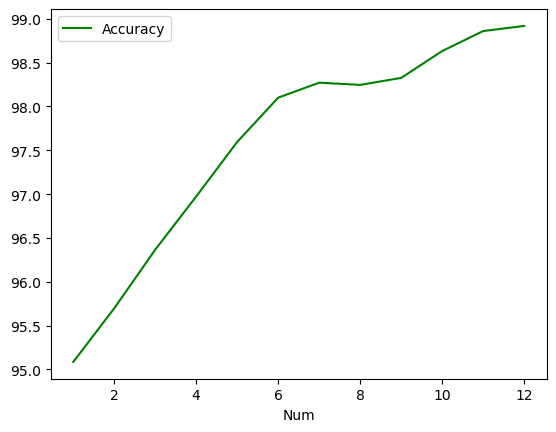

In [248]:
ax = plt.gca()
Final.plot(kind='line',
        x='Num',
        y='Accuracy',
        color='green', ax=ax)
plt.show()